In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classicalfield import FiniteTempGPE as gpe

from scipy.fft import fft2, ifft2, fftshift, ifftshift 

In [ ]:
g = gpe(numImagSteps=500, numRealSteps = 10000, Nsamples=1, vortex = False) # 15, 10000

# decrease the potential to back to where it was to make sure the same result is achieved

No vortices to be spawned


In [178]:
g = gpe(numImagSteps=500, Nsamples=1)

No vortices to be spawned
Total Imag Time:  52.05362343788147


In [179]:
g.simulate(100000)

Text(0.5, 1.0, 'Initial Position Densities at T=10.35 in an Optical Box Trap')

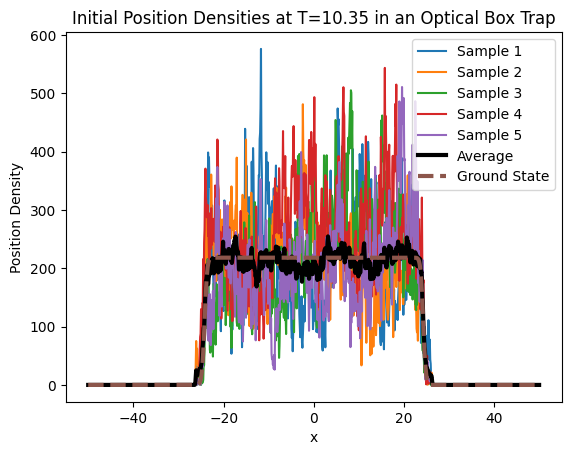

In [8]:
avg_dens = np.mean(np.abs(g.final_psis)**2, axis = 0, dtype = np.complex_)

plt.figure() 
for i in range(5): 
    plt.plot(g.xi[0][0], np.abs(g.final_psis[i])[len(g.final_psis[0])//2]**2, label = f'Sample {i+1}')
plt.plot(g.xi[0][0], np.abs(avg_dens)[len(avg_dens)//2], label = 'Average', linewidth = 3, color= 'black')
plt.plot(g.xi[0][0], np.abs(g.gs[len(g.gs)//2])**2, linewidth = 3, linestyle = '--', label = 'Ground State')
plt.legend() 
plt.xlabel('x')
plt.ylabel('Position Density')
plt.title(f'Initial Position Densities at T={g.T:.2f} in an Optical Box Trap')

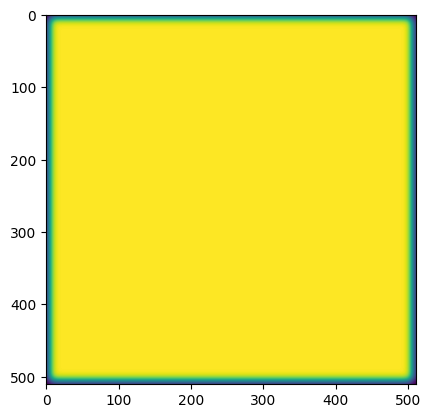

In [9]:
## extract box from ground state 
grid = g.xi
mask = (np.abs(grid[0])<g.L//2)&(np.abs(grid[1])<g.L//2)
dim = int(np.sqrt(np.shape(grid[0][mask])))
small_gs = g.gs[mask].reshape((dim, dim))
plt.imshow(np.abs(small_gs))

In [24]:
box = g.extractBox(g.xi, g.gs)

C:\Users\TQC User\AppData\Local\Temp\ipykernel_21304\3253155803.py:18: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--', color = 'purple')


Text(0.5, 1.0, 'Initial Momentum Densities at T=10.35 in an Optical Box Trap')

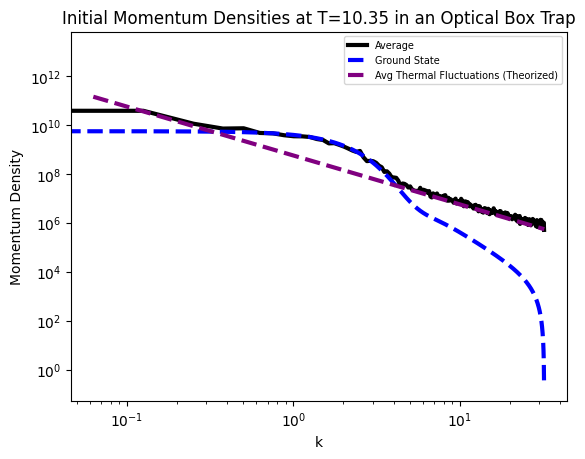

In [57]:
# now test in k space 
coef = g.winL/g.dx**2/2

kdens_avg = np.mean(np.abs(g.short_wfk)**2, axis = 0, dtype = np.complex_)

plt.figure() 
# for i in range(5): 
#     plt.plot(fftshift(g.kgrid_short), fftshift(np.abs(g.short_wfk[i])[0]**2), label = f'Sample {i+1}')
# for i in range(len(g.short_wfk)):
#     plt.plot(fftshift(g.kgrid_short), fftshift(np.abs(g.short_wfk[i])[0]**2))



plt.plot(fftshift(g.kgrid_short), fftshift(kdens_avg[0]), color = 'black', linewidth = 3, label = 'Average')
plt.plot(fftshift(g.kgrid_short), fftshift(np.abs(fft2(small_gs)[0])**2), label = 'Ground State', linewidth = 3, linestyle = '--', color = 'blue')


plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--', color = 'purple')


plt.legend(bbox_to_anchor = [1, 0.6]) 
plt.legend(prop={'size':7}, loc = 'best')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Momentum Density')
plt.title(f'Initial Momentum Densities at T={g.T:.2f} in an Optical Box Trap')

Testing over time propagation

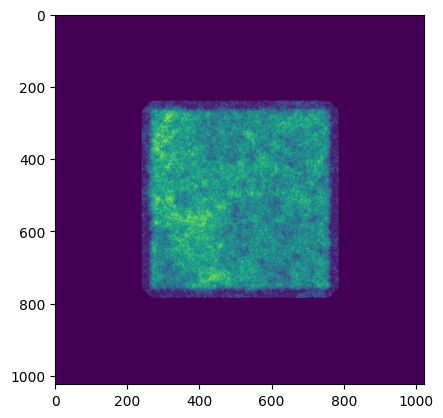

In [80]:
plt.imshow(np.abs(g.snaps[0]))

In [81]:
print(np.shape(g.snaps))

(3, 1024, 1024)


Text(0.5, 1.0, 'Position Wavefunction before and after Propagation (t = 95)')

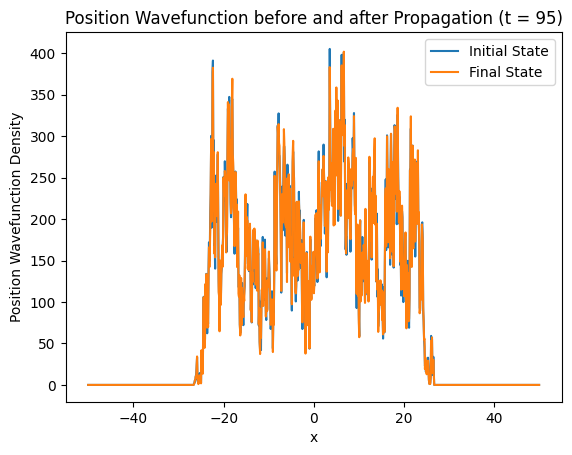

In [182]:
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[0])//2])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('Position Wavefunction Density')
plt.legend() 
plt.title('Position Wavefunction before and after Propagation (t = 95)')

C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Intiial and Final Densities in Position Space in Box Trap')

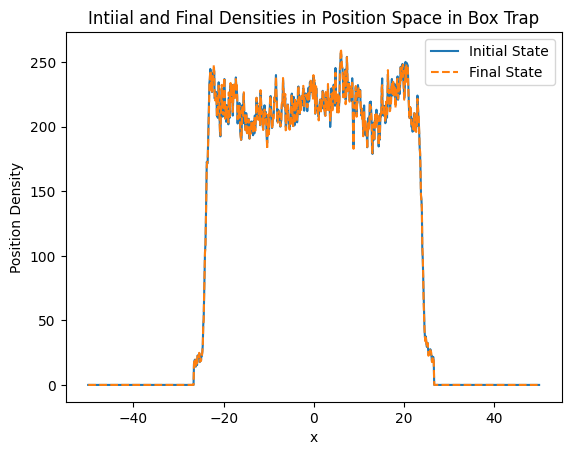

In [175]:
avg_initx = np.mean(np.abs(g.wf_samples)**2, axis = 0, dtype = np.complex_)
avg_finalx = np.mean(np.abs(g.final_psis)**2, axis = 0, dtype = np.complex_)

plt.plot(g.xi[0][0], avg_initx[len(g.snaps[0])//2], label = 'Initial State')
plt.plot(g.xi[0][0], avg_finalx[len(g.snaps[0])//2], label = 'Final State', linestyle = '--')
plt.legend()
plt.xlabel('x')
plt.ylabel('Position Density')
plt.title('Intiial and Final Densities in Position Space in Box Trap')

In [185]:
init_k_states = [] 

grid = g.extractBox(g.xi, g.wf_samples[0])[2]
for i in range(len(g.wf_samples)): 
    init_k_states.append(g.extractBox(g.xi, g.wf_samples[i])[3])


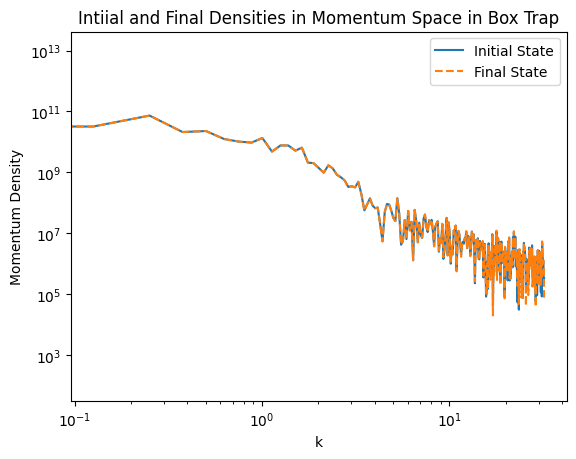

In [188]:
avg_initk = np.mean(np.abs(init_k_states)**2, axis = 0, dtype = np.complex_)
avg_finalk = np.mean(np.abs(g.short_wfk)**2, axis = 0, dtype = np.complex_)

plt.plot(fftshift(grid), fftshift(avg_initk[0]), label = 'Initial State')
plt.plot(fftshift(grid), fftshift(avg_finalk[0]), label = 'Final State', linestyle = '--')
plt.yscale('log') 
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Momentum Density')
plt.title('Intiial and Final Densities in Momentum Space in Box Trap')
plt.legend()

Curve Fitting

In [47]:
from scipy.optimize import curve_fit

In [48]:
def fittingfunc(x, b, m): 
    return b* x**m

def cleandata(grid, noise): 
    mask = (grid > 0) & (noise > 0)

    grid_clean = grid[mask]
    noise_clean = noise[mask]

    return grid_clean, noise_clean

C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


[ 5.69788033e+08 -1.89837587e+00]


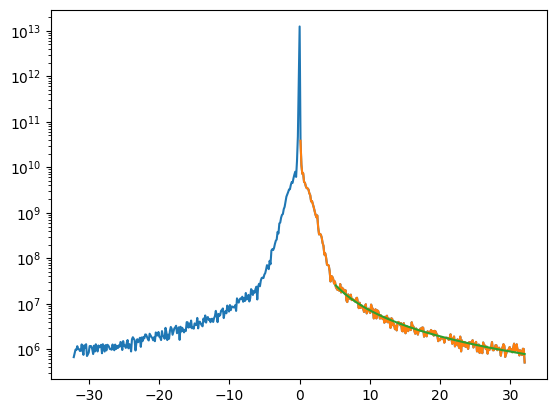

In [49]:
thres = 40
k_clean, noise_clean = cleandata(g.kgrid_short, kdens_avg[0])
popt, pcov = curve_fit(fittingfunc, k_clean[thres:], noise_clean[thres:])
print(popt)

plt.plot(fftshift(g.kgrid_short), fftshift(kdens_avg[0]), label = 'Final State')

plt.plot(k_clean, noise_clean)
plt.plot(k_clean[thres:], fittingfunc(k_clean[thres:], *popt))

#plt.plot(ifftshift(g.ki[0][0][1:]), 10e6*ifftshift(2*g.T/g.ki[0][0][1:]**2), label = 'Theory')
plt.yscale('log') 
# plt.xscale('log')


In [50]:
coef = g.winL/g.dx**2/2

In [51]:
k_samples = [] 

for i in range(25): 
     k_samples.append(coef * g.genPsiK())
k_samples = np.array(k_samples) 
avg_k_samples = np.mean(np.abs(k_samples)**2, axis = 0, dtype = np.complex_)

psik = g.winL/g.dx**2*g.genPsiK() 


(511,)


C:\Users\TQC User\AppData\Local\Temp\ipykernel_21304\3640073454.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(g.ki[0][0], coef**2*2*g.T/g.ki[0][0]**2, label = 'Theory')


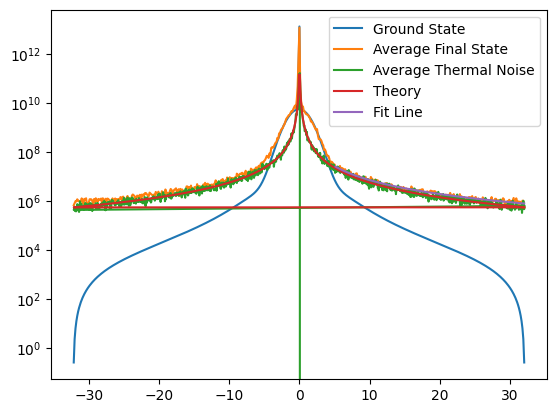

In [53]:
## Check to see where the thermal noise dominates the wavefunction 
params = g.extractBox(g.xi, g.gs) 
gs_k = fft2(g.gs) 
print(np.shape(params[2]))
plt.plot(fftshift(params[2]), fftshift(np.abs(params[3][0])**2), label = 'Ground State')
plt.plot(fftshift(g.kgrid_short), fftshift(kdens_avg[0]), label = 'Average Final State')

plt.plot(g.ki[0][0], avg_k_samples[0], label = 'Average Thermal Noise')
plt.plot(g.ki[0][0], coef**2*2*g.T/g.ki[0][0]**2, label = 'Theory')

plt.plot(k_clean[thres:], fittingfunc(k_clean[thres:], *popt), label = 'Fit Line')
plt.yscale('log')
plt.legend() 
# plt.xscale('log')

(511,)


C:\Users\TQC User\AppData\Local\Temp\ipykernel_21304\244936149.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(g.ki[0][0], coef**2*2*g.T/g.ki[0][0]**2, label = 'Theory')


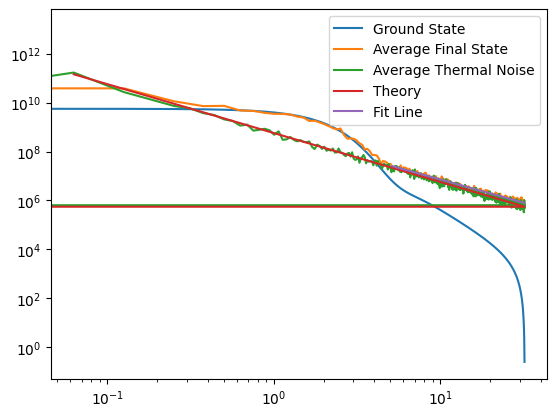

In [52]:
## Check to see where the thermal noise dominates the wavefunction 
params = g.extractBox(g.xi, g.gs) 
gs_k = fft2(g.gs) 
print(np.shape(params[2]))
plt.plot(fftshift(params[2]), fftshift(np.abs(params[3][0])**2), label = 'Ground State')
plt.plot(fftshift(g.kgrid_short), fftshift(kdens_avg[0]), label = 'Average Final State')

plt.plot(g.ki[0][0], avg_k_samples[0], label = 'Average Thermal Noise')
plt.plot(g.ki[0][0], coef**2*2*g.T/g.ki[0][0]**2, label = 'Theory')

plt.plot(k_clean[thres:], fittingfunc(k_clean[thres:], *popt), label = 'Fit Line')
plt.yscale('log')
plt.xscale('log')
plt.legend() 

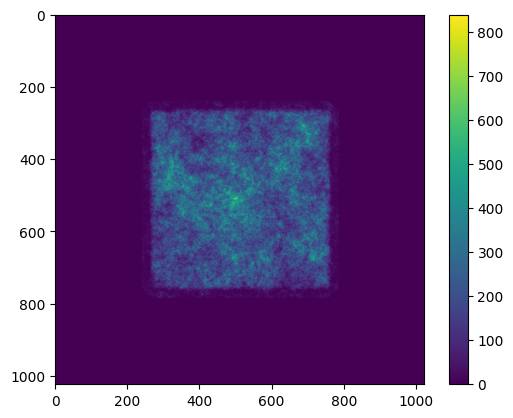

In [54]:
plt.imshow(np.abs(g.wf_samples[0])**2)
plt.colorbar() 

C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


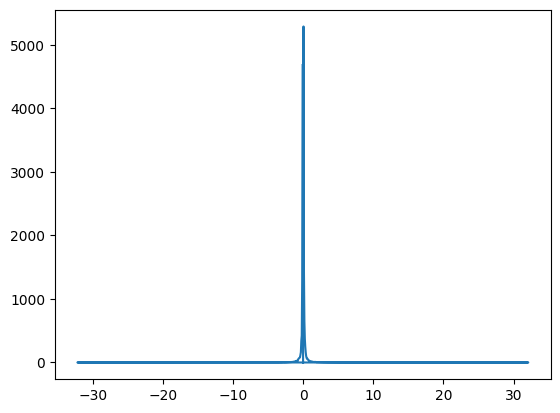

In [49]:
plt.plot(g.ki[0][0], g.average_thnoise[0])

MISC Testing

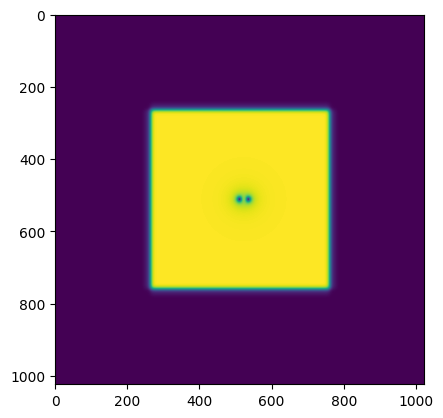

In [6]:
plt.figure() 
plt.imshow(np.abs(g.wf_noisy)) 
plt.show() 

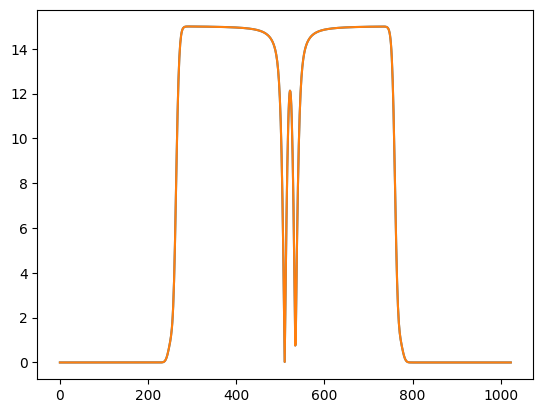

In [11]:
plt.figure() 
plt.plot(np.abs(g.wf_noisy[len(g.wf_noisy)//2]))
plt.plot(np.abs(g.gs[len(g.gs)//2]) )
plt.show() 

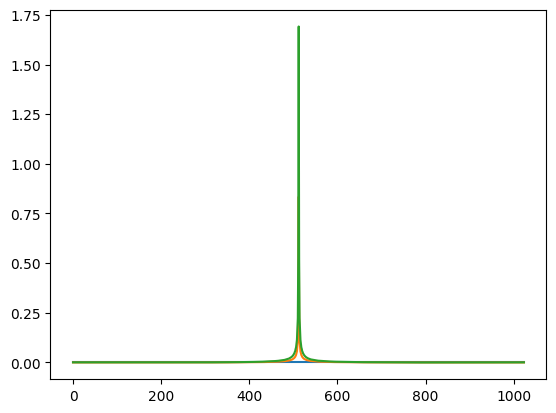

In [44]:
plt.figure() 
plt.plot(np.abs((g.classical_wavefunctions[-1][len(g.classical_wavefunctions[-1])//2]) ))
plt.plot(np.abs(ifftshift(g.classical_wavefunctions[-1][:,0]) ))
plt.plot(np.abs(ifftshift(g.classical_wavefunctions[0][:,0]) ))
plt.show() 

In [15]:
arr = g.genPsiK() 

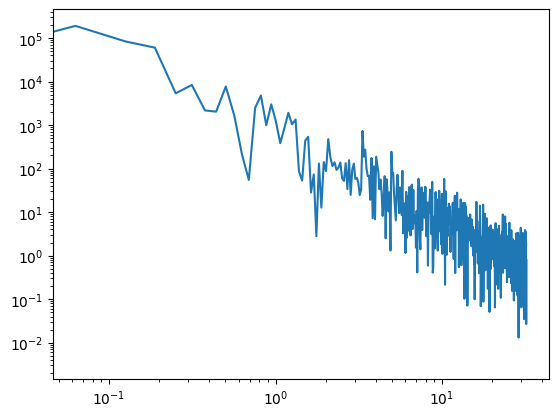

In [148]:
plt.figure() 
plt.plot(ifftshift(g.ki[0][0]),ifftshift(np.abs(g.genPsiK()[0])**2))
plt.yscale('log')
plt.xscale('log')
plt.show() 

In [129]:
print(ifftshift(g.ki[0][0])[0])
print(g.dx)
print(np.pi/g.dx)

-32.169908772759484
0.09765625
32.169908772759484


In [3]:
num = 100
ksamples = np.zeros((num, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)

for i in range(num): 
    ksamples[i] = g.genPsiK()
 
average_result = np.mean(np.abs(ksamples)**2, axis = 0, dtype = np.complex_)
print(average_result.shape)

(1024, 1024)


C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\TQC User\AppData\Local\Temp\ipykernel_1136\3455661790.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(ifftshift(g.ki[0][0]), ifftshift(2*g.T/g.ki[0][0]**2), label = 'Theory')


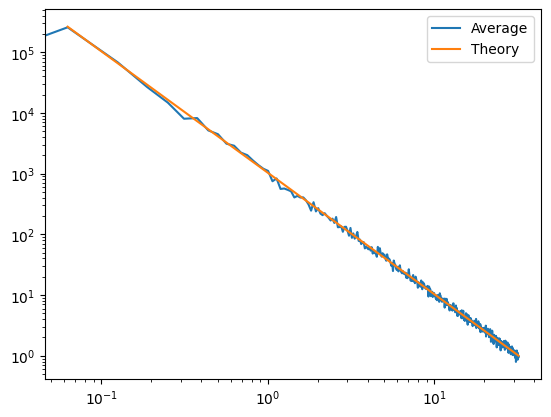

In [4]:
plt.figure() 
# for i in range(num): 
#     plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(ksamples[i][0]**2)))
plt.plot(ifftshift(g.ki[0][0]), ifftshift(average_result[0]), label = 'Average')
plt.yscale('log')
plt.xscale('log')
plt.plot(ifftshift(g.ki[0][0]), ifftshift(2*g.T/g.ki[0][0]**2), label = 'Theory')
plt.legend() 

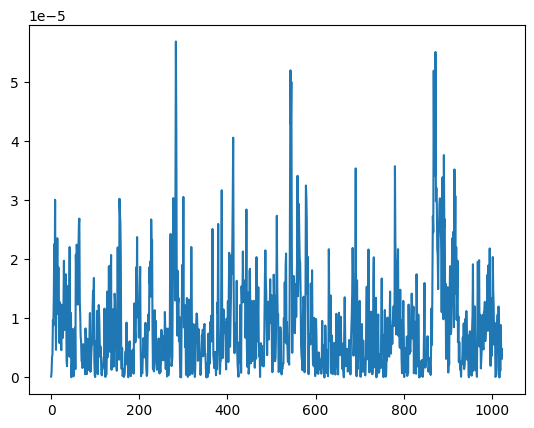

In [148]:
plt.figure() 
plt.plot(np.abs(ifft2(ksamples[0])[len(ksamples)//2])**2)
plt.show() 

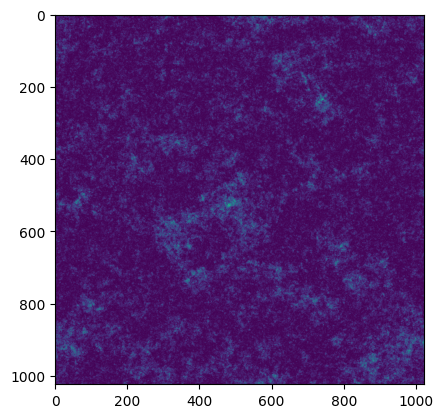

In [150]:
plt.figure() 
plt.imshow(np.abs(ifft2(ksamples[0])**2))
plt.show() 

Implement the coefficient - substitute the physical wavefunction for the scipy wavefunction (solving for psi scipy from eq. 10)
- Do the inverse fourier transform to get the wavefunction in real space
- then add this to the ground state wavefunction (first without vortices) 
- confirm that the interaction strength is indeed much smaller than the temperature 
- incorporate the vortices


44250.564072773464


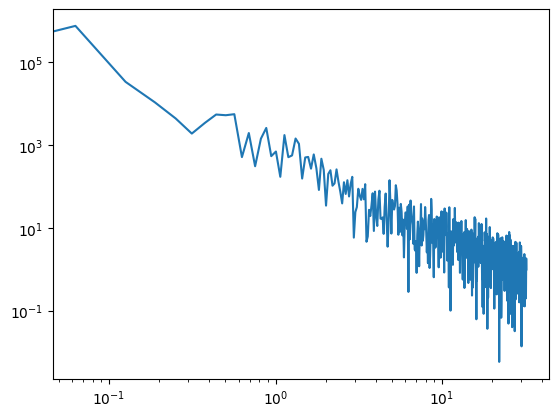

In [169]:
plt.figure() 
plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(ksamples[0][0])**2))
plt.yscale('log')
plt.xscale('log')

print(np.sum(np.abs(ksamples[0])**2)*g.dk**2)

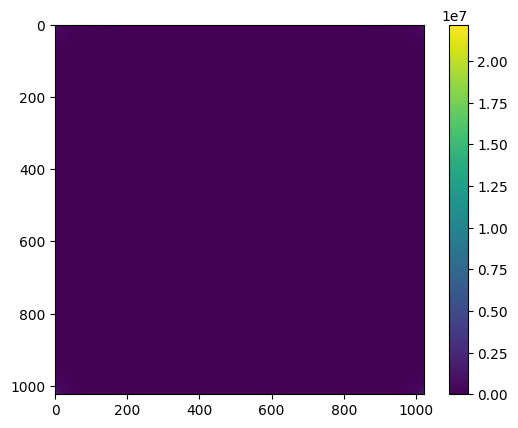

In [218]:
plt.figure() 
plt.imshow(g.winL/g.dk**2 * np.abs(ksamples[0]))
plt.colorbar() 
plt.show()

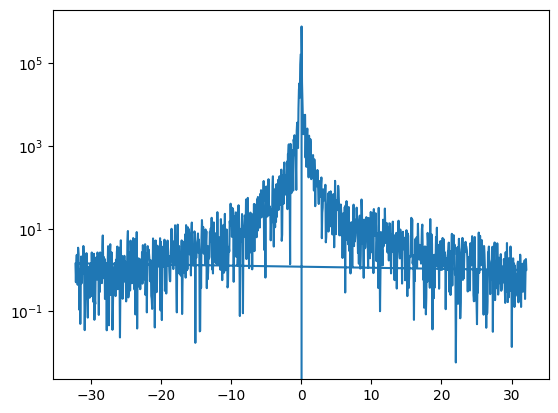

In [224]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(ksamples[0][0])**2)
plt.yscale('log')
plt.show() 

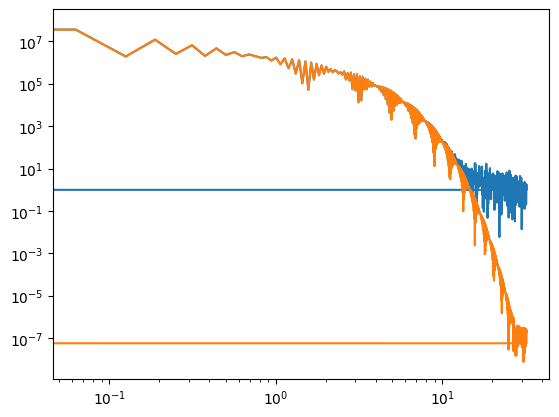

In [241]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(np.abs(g.gs)**2)[0]) + np.abs(ksamples[0][0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(np.abs(g.gs)**2)[0]))
#plt.plot(g.ki[0][0], np.abs(ksamples[0][0])**2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

In [245]:
L_k = fftshift(g.ki[0][0])[-1] - fftshift(g.ki[0][0])[0]

In [248]:
print(L_k/g.dk)
print(g.winL/g.dx)

1023.0
1024.0


14256219.167024972
27024071.33072654


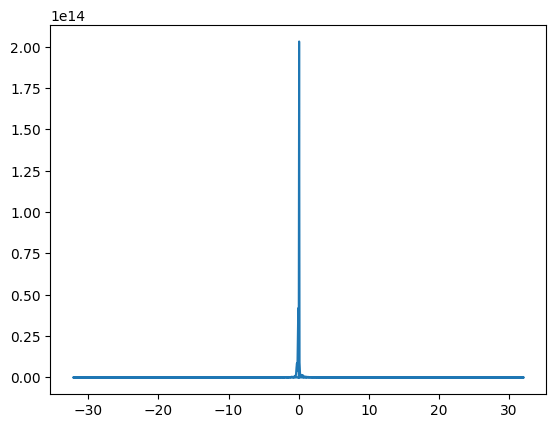

In [246]:
psik_sp = L_k/g.dk**2 * np.abs(ksamples[0])
print(np.max(psik_sp))
psix = ifft2(psik_sp)
print(np.sum(np.abs(psix)**2)*g.dx**2)
#print(np.sum(np.abs(psik_sp)**2)*g.dx**2)
plt.figure() 
plt.plot(g.ki[0][0],  np.abs(psik_sp[0])**2)
plt.show()

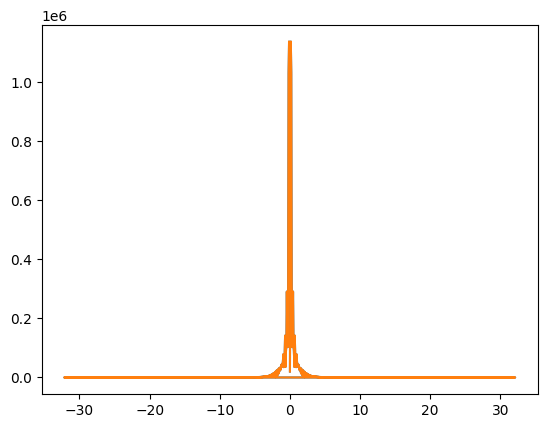

In [191]:
psik_gs = fft2(g.gs)
plt.figure() 
plt.plot(g.ki[0][0],  np.abs(psik_gs[0]))
plt.plot(g.ki[0][0], np.abs(psik_gs[0]) + np.abs(ksamples[0][0]))
plt.show()

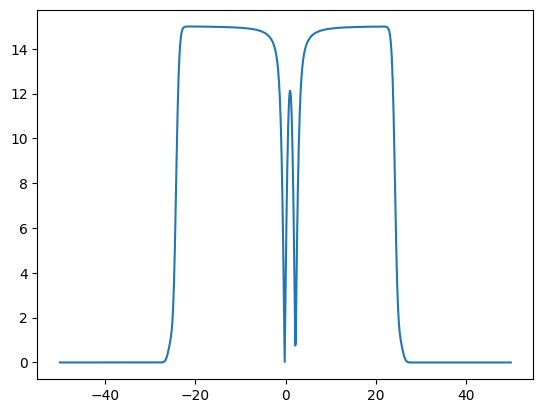

2802199.70543407


In [174]:
psik_sp = g.L/g.dx**2 * ksamples[0] 
psix = ifft2(psik_sp)

plt.figure() 
plt.plot(g.xi[0][0],  np.abs(g.gs[len(g.gs)//2]))
plt.show() 

print(np.sum(np.abs(psix)**2)*g.dx**2)

### Plotting the momentum curve

In [111]:
kdens = np.abs(ksamples[10])**2

print(np.sum(kdens)**g.dk**2)

rdens = ifft2(kdens) 
r_norm = np.sum(np.abs(rdens))*g.dx**2

wfdens_norm = rdens/r_norm
print(np.sum(np.abs((wfdens_norm)))*g.dx**2)


real_wavef = g.gpeobj.Natoms * wfdens_norm

print(np.sum(np.abs(real_wavef))*g.dx**2)
print(np.sum(np.abs(g.gs)**2)*g.dx**2)

## Notes: where should the Fourier shift go? Should there be a fourier shift somewhere? Why? Compare to the vortex code and the placements of the shifts and sketch it out.
# Also look at scipy documentation online on how the shifts and fourier transforms are implemented 


1.065797052951658
1.0000000000000002
512000.0000000001
512000.0


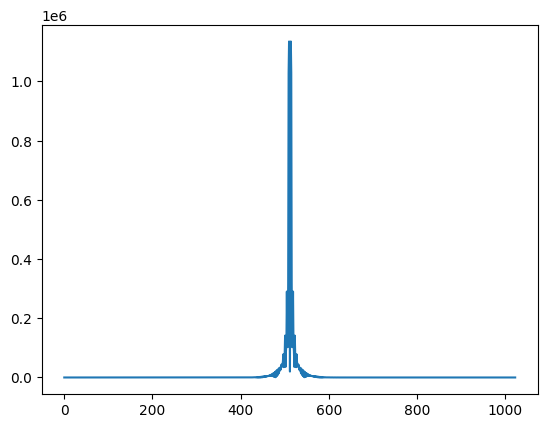

In [127]:
# the momentum for the ground state should be zero 
plt.figure() 
plt.plot(np.abs(fftshift(fft2(g.gs)))[len(g.gs)//2])
plt.show() 

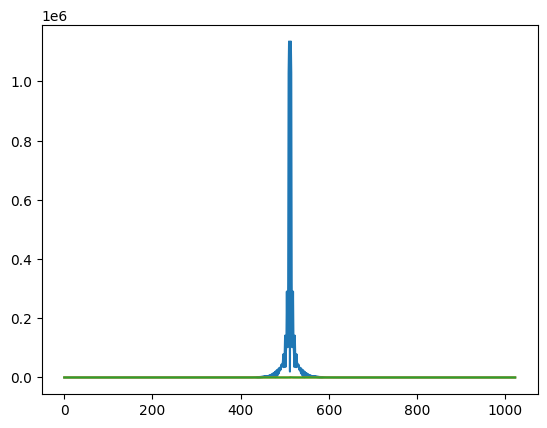

In [136]:
plt.figure() 
plt.plot(np.abs(fftshift(fft2(g.gs)))[len(g.gs)//2])
plt.plot(ifftshift(np.abs(ksamples[0][0])))
plt.plot(ifftshift(np.abs(ksamples[1][0])))
plt.show() 

In [145]:
#gs_k = np.abs(fftshift(fft2(g.gs)))[len(g.gs)//2]

gs_k = fftshift(fft2(np.abs(g.gs)))
print(np.sum(np.abs(gs_k)**2)*g.dk**2)
norm = np.sum(gs_k**2) * g.dk**2
print(norm)
print(np.sum((np.abs(gs_k/norm))**2)*g.dk**2)

222243733515.20114
(222183553413.27417-9.991818108311537e-09j)
(4.500783179662013e-12+3.183726203685142e-31j)


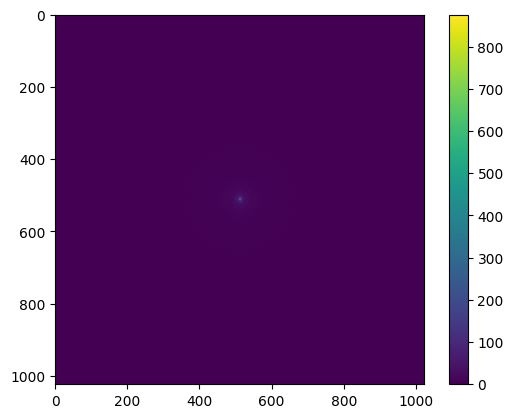

In [133]:
plt.figure() 
plt.imshow(np.abs(ifftshift(ksamples[0])))
plt.colorbar() 

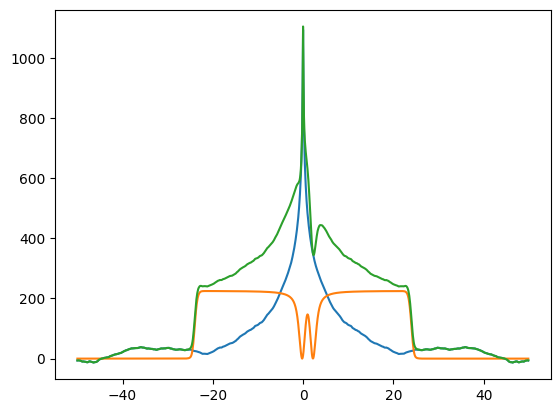

In [112]:
plt.figure() 
plt.plot(g.xi[0][0], ifftshift(real_wavef[0]))
plt.plot(g.xi[0][0], np.abs(g.gs)[len(g.gs)//2]**2)
plt.plot(g.xi[0][0], np.abs(g.gs)[len(g.gs)//2]**2 + ifftshift(real_wavef[0]) )


In [47]:
print(np.sum(np.abs(new_rcurve)**2)*g.dx**2)

0.5879128313632582


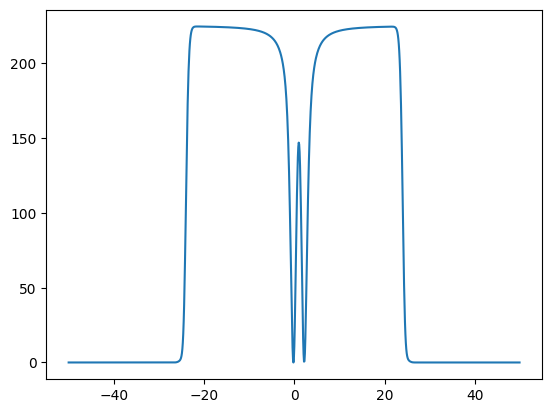

In [34]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.gs[len(g.gs)//2]**2))
plt.show() 

In [37]:
print(np.sum(np.abs(g.gs)**2) * g.dx**2)
print(g.gpeobj.Natoms)

512000.0
512000


TODO: 
- Where is the noise on the spatial wavefunction after the momentum noise is added? 
- Plot the momentum wavefunction as generated above but in real space (not momentum space) to see which two wavefunctions are being summed in the noise generation 

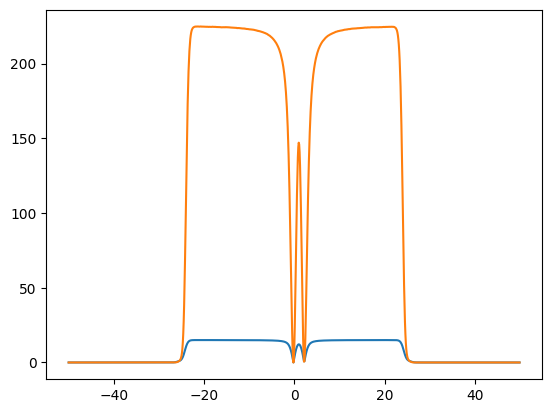

In [14]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.gs[len(g.gs)//2]))
plt.plot(g.xi[0][0], np.abs(g.wf_noisy[0][len(g.wf_noisy[0])//2])**2)
plt.show() 

MISC

In [161]:
num = 100
ksamples = np.zeros((num, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)

for i in range(num): 
    ksamples[i] = g.genPsiK()
 
average_result = np.mean(np.abs(ksamples)**2, axis = 0, dtype = np.complex_)
print(average_result.shape)

(1024, 1024)


C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\TQC User\AppData\Local\Temp\ipykernel_2702492\2325744162.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(ifftshift(g.ki[0][0]), ifftshift(g.T/g.ki[0][0]**2), label = 'Theory')


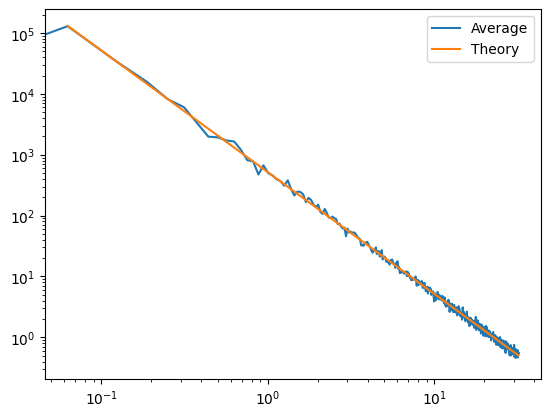

In [164]:
plt.figure() 
# for i in range(num): 
#     plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(ksamples[i][0]**2)))
plt.plot(ifftshift(g.ki[0][0]), ifftshift(average_result[0])/2, label = 'Average')
plt.yscale('log')
plt.xscale('log')
plt.plot(ifftshift(g.ki[0][0]), ifftshift(g.T/g.ki[0][0]**2), label = 'Theory')
plt.legend() 

C:\Users\TQC User\AppData\Local\Temp\ipykernel_2702492\1152822987.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(ifftshift(g.ki[0][0]), ifftshift(g.T/g.ki[0][0]**2))


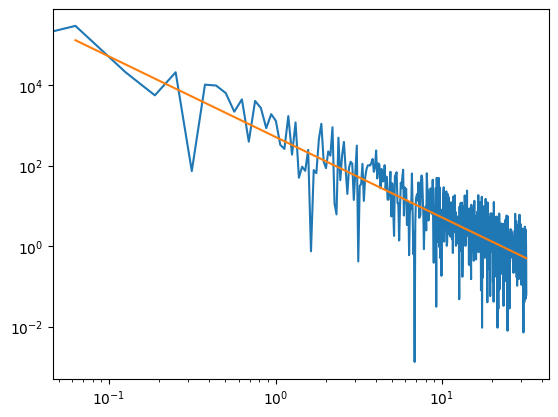

In [139]:
plt.figure() 
plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(arr[0])**2))
plt.yscale('log')
plt.xscale('log')
plt.plot(ifftshift(g.ki[0][0]), ifftshift(g.T/g.ki[0][0]**2))

C:\Users\TQC User\AppData\Local\Temp\ipykernel_2702492\1152822987.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(ifftshift(g.ki[0][0]), ifftshift(g.T/g.ki[0][0]**2))


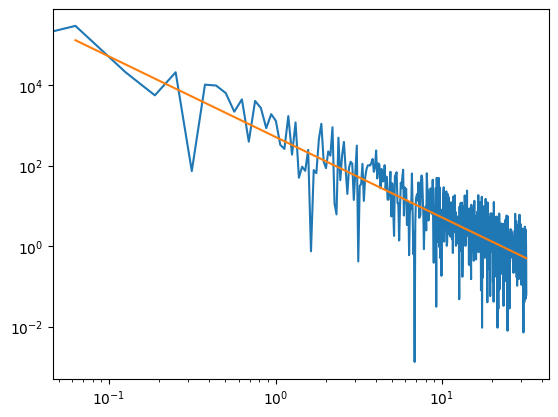

In [144]:
plt.figure() 
plt.plot(ifftshift(g.ki[0][0]), ifftshift(np.abs(arr[0])**2))
plt.yscale('log')
plt.xscale('log')
plt.plot(ifftshift(g.ki[0][0]), ifftshift(g.T/g.ki[0][0]**2))

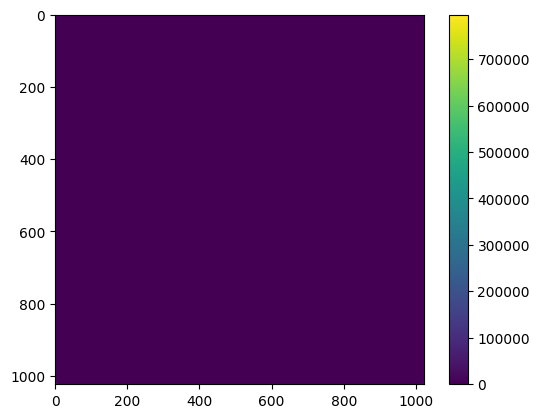

In [46]:
plt.figure() 
plt.imshow(np.abs(arr)**2)
plt.colorbar() 
plt.show() 

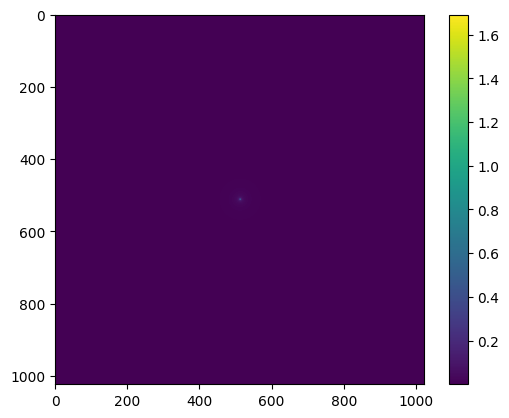

In [32]:
plt.figure() 
plt.imshow(np.abs(ifftshift(g.classical_wavefunctions[0])))
plt.colorbar() 
plt.show() 

Notes: 
- The randomness is not coming through
- The noise wavefunction does not seem to make any notable contribution to the total wavefunction- adding the noise seems to still leave us in the ground state 